In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from functions_tobi import image_plot
tf.__version__ # '2.1.0'

'2.1.0'

In [2]:
(x_train, y_train), (x_test, _) = mnist.load_data()
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [3]:
def loadDecoder(prefix="0_"):
    json_file = open('models/{}decoder_all.json'.format(prefix), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    decoder = model_from_json(loaded_model_json)
    decoder.load_weights("models/{}decoder_all.h5".format(prefix))
    return decoder

def loadEncoder(prefix="0_"):
    json_file = open('models/{}encoder_all.json'.format(prefix), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    encoder = model_from_json(loaded_model_json)
    encoder.load_weights("models/{}encoder_all.h5".format(prefix))
    return encoder

def getNumbersFromMNIST(X, y, number=0):
    if number==None:
        return X, y
    inds = np.where(y==number)[0]
    return X[inds], y[inds]

def pairplot(X, pos, num_imgs=900, number=0):
    inds = np.linspace(0,len(X),num_imgs, dtype=int)[:-1]
    image_plot(pos[inds], 3, X[inds][:,:,:,0], 'pairplot{}.png'.format(number))


In [4]:
encoder = loadEncoder(prefix='')
X, y = getNumbersFromMNIST(x_train, y_train, number=None)
X_ae = encoder.predict(X[:6000])

In [5]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(X_ae)

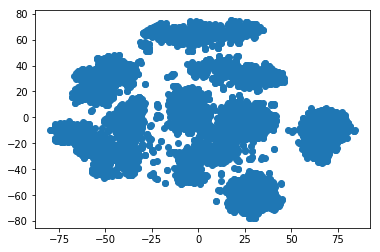

In [6]:
plt.scatter(X_tsne[:,0], X_tsne[:,1])

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans()

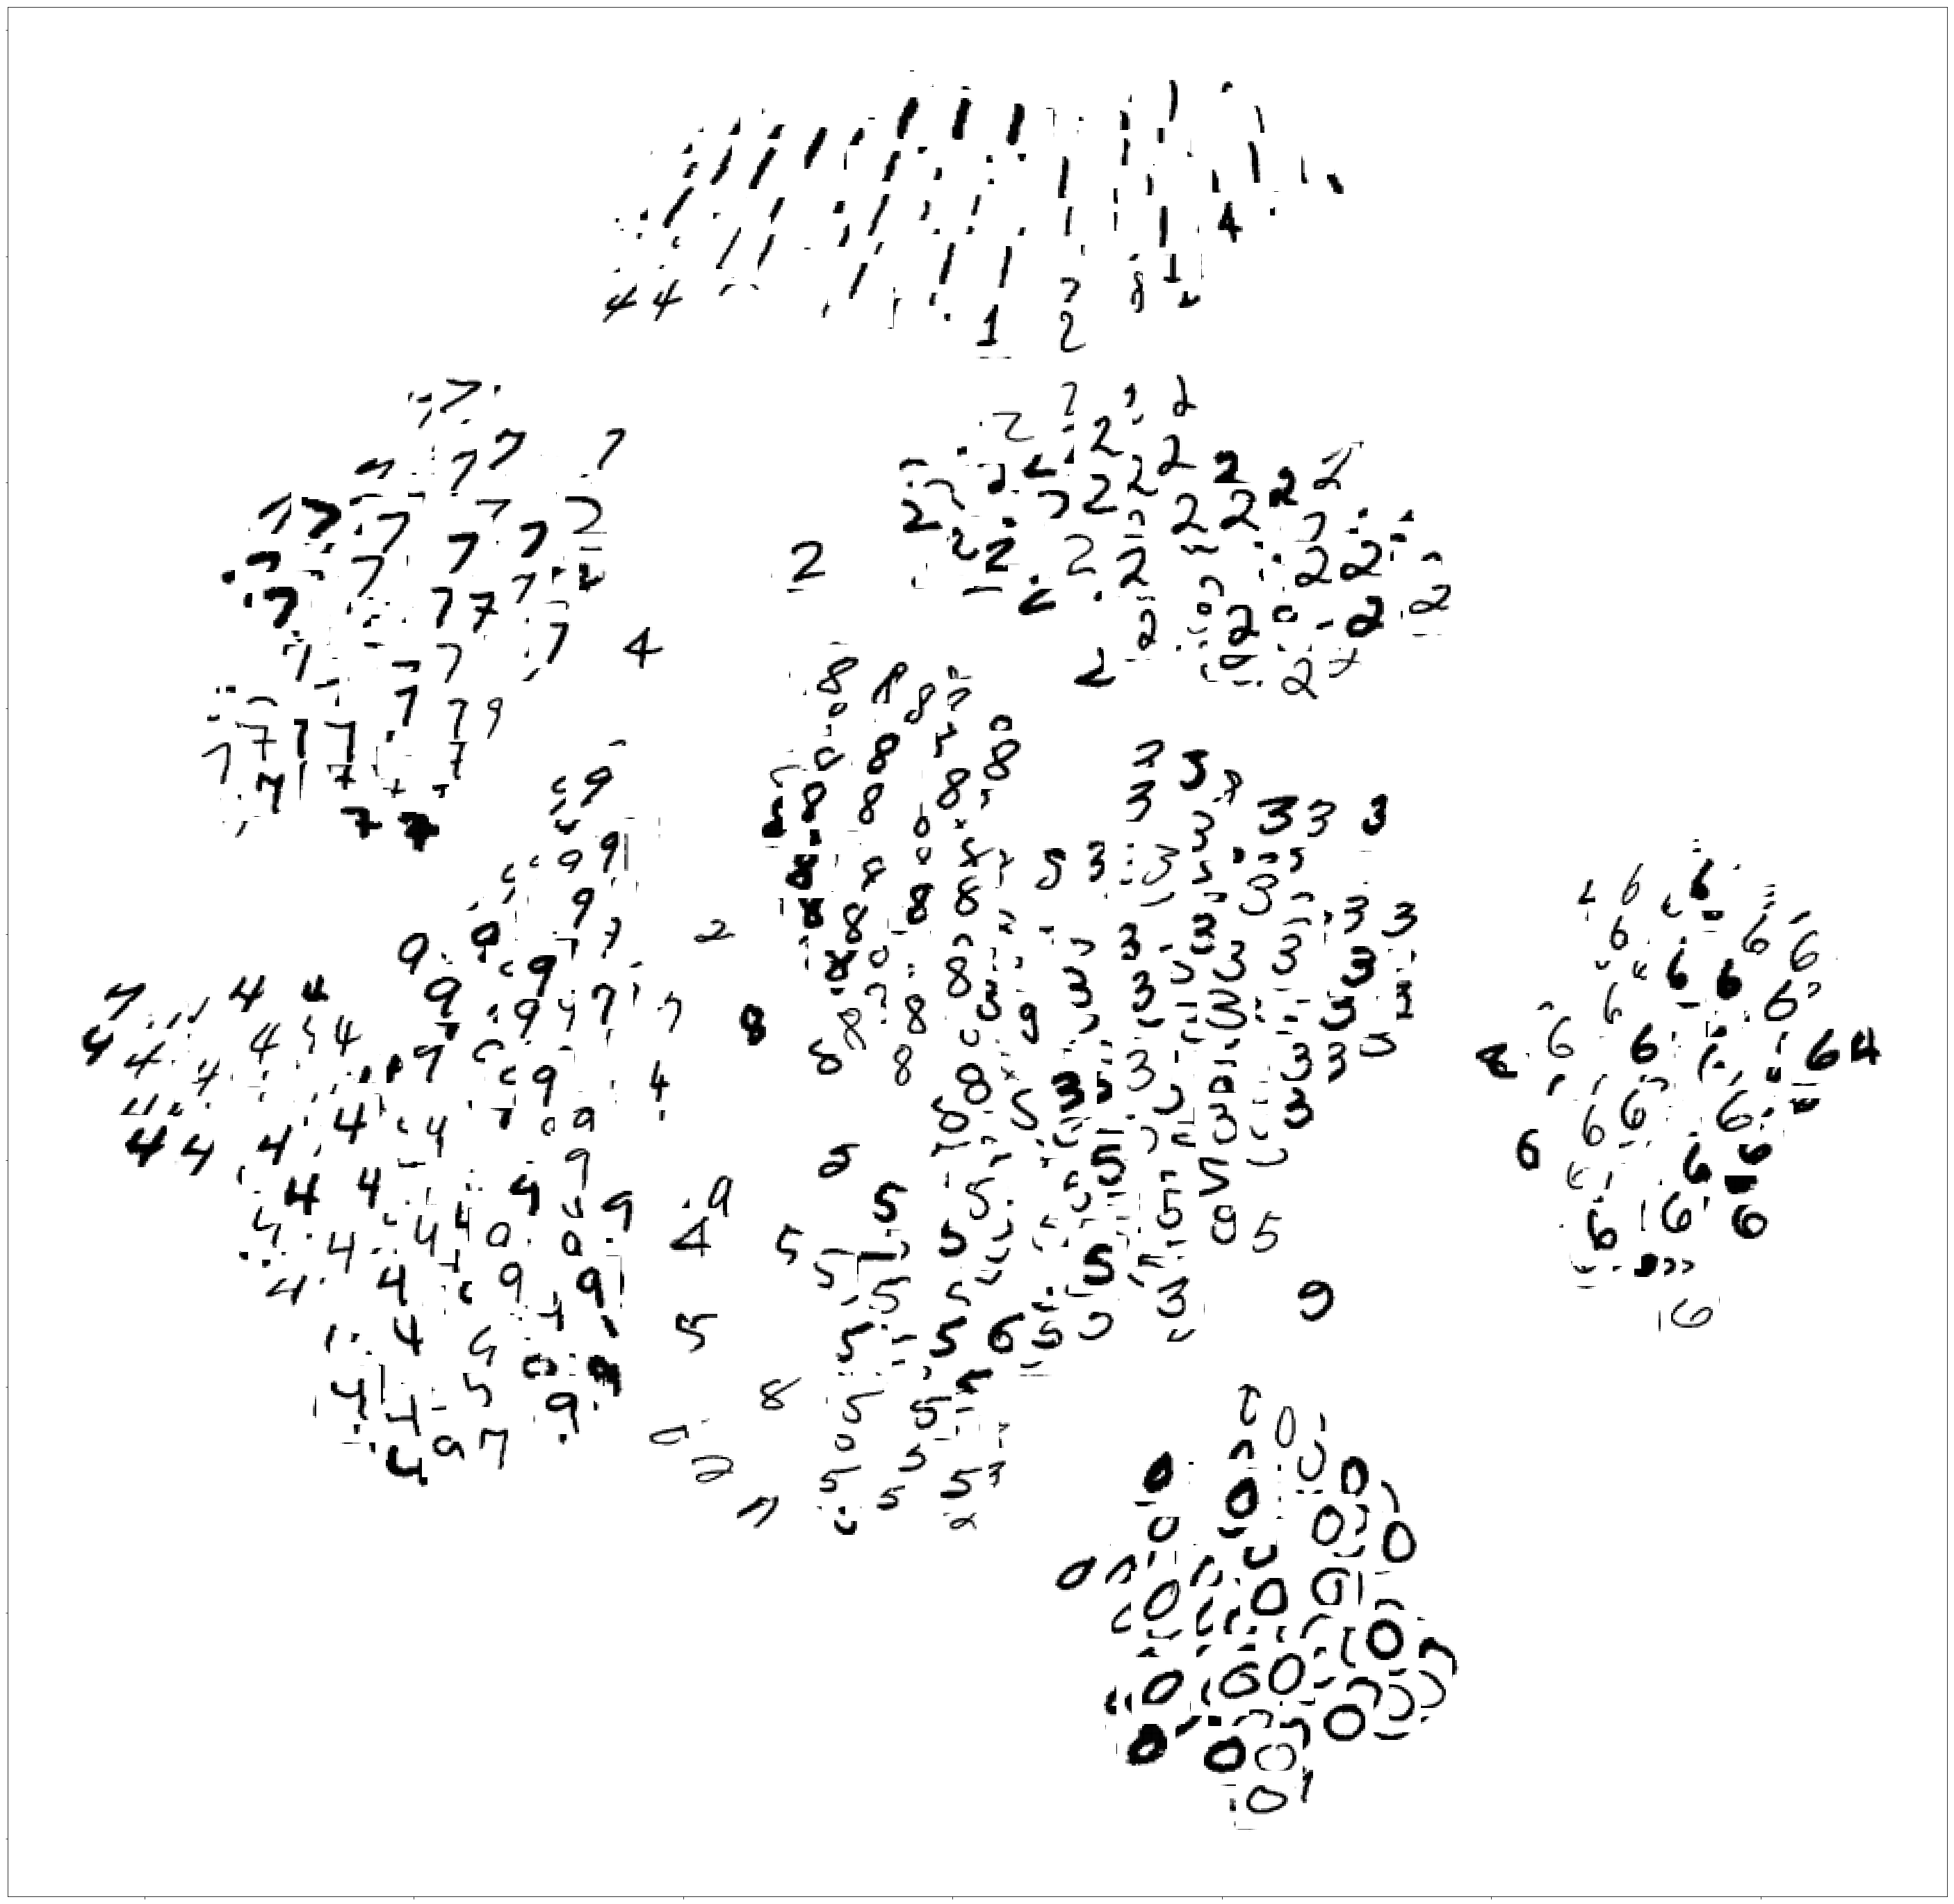

In [8]:
pairplot(X[:2000], X_tsne[:2000], num_imgs = 2000, number=None)

In [9]:
X.shape, X_ae.shape

((60000, 28, 28, 1), (6000, 64))

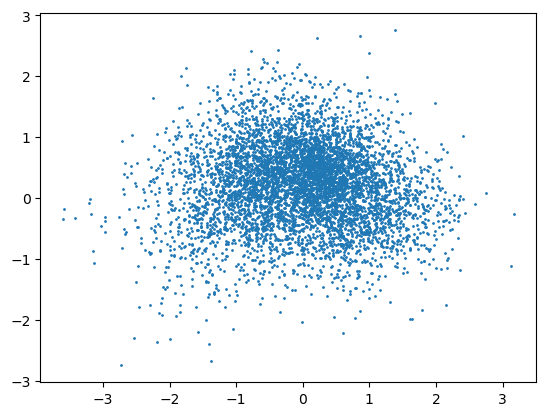

In [10]:
plt.scatter(X_ae[:,0], X_ae[:,1], s=1)

In [11]:
def plotFromInds(inds):
    x_train_sorted = x_train[inds]
    
    fig, axs = plt.subplots(4, 2, figsize=(3,8))

    print(axs.shape)
    for i in range(2):
        axs[i,0].imshow(x_train_sorted[i*2,:,:,0])
        axs[i,0].set_title('{}'.format(i*2))

        axs[i,1].imshow(x_train_sorted[i*2+1,:,:,0])
        axs[i,1].set_title('{}'.format(i*2+1))

    for i in range(2,4):
        axs[i,0].imshow(x_train_sorted[-i*2,:,:,0])
        axs[i,0].set_title('{}'.format(-i*2))

        axs[i,1].imshow(x_train_sorted[-i*2-1,:,:,0])
        axs[i,1].set_title('{}'.format(-i*2-1))

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    plt.show()
    
def pairplotFromEncoder(number=0):
    # load json and create model
    json_file = open('models/05_03_encoder_{}.json'.format(number), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    encoder = model_from_json(loaded_model_json)
    encoder.load_weights("models/05_03_encoder_{}.h5".format(number))
    
    inds = np.where(y_train==number)[0]
    x_train_only = x_train[inds]
    encoder_output = encoder.predict(x_train_only)
    
    

    combs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
    inds = np.random.randint(0,len(encoder_output), 900)
    for coords in combs:
        image_plot(np.array([encoder_output[inds,coords[0]],encoder_output[inds,coords[1]]]).T, 3, x_train_only[inds][:,:,:,0], 'plots{}/feature_{}.png'.format(number,coords))


def sortedFromEncoder(number=0):
    # load json and create model
    json_file = open('models/05_03_encoder_{}.json'.format(number), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    encoder = model_from_json(loaded_model_json)
    encoder.load_weights("models/05_03_encoder_{}.h5".format(number))
    
    inds = np.where(y_train==number)[0]
    encoder_output = encoder.predict(x_train[inds])
    x_train_only = x_train[inds]
    
    dim = 30
    inds_images = np.linspace(0,len(encoder_output),dim*dim, dtype=int)[:-1]

    for i in range(4):
        indsX = np.argsort(encoder_output[:,i])[inds_images]
        inds_for_plot = np.reshape(np.indices((dim,dim)).T, (dim*dim,2))
        image_plot(inds_for_plot, 3, x_train_only[indsX][:,:,:,0], 'plots{}/feature_{}.png'.format(number,i))

In [12]:
#sortedFromEncoder(1)
pairplotFromEncoder(4)

IOError: [Errno 2] No such file or directory: 'models/05_03_encoder_4.json'

In [ ]:

from functions_tobi import image_plot
dim = 30
inds_images = np.linspace(0,59999,dim*dim, dtype=int)

for i in range(4,8):
    indsX = np.argsort(encoder_output[:,i])[inds_images]
    inds_for_plot = np.reshape(np.indices((dim,dim)).T, (dim*dim,2))
    image_plot(inds_for_plot, 3, x_train[indsX][:,:,:,0], 'feature_{}.png'.format(i))

In [ ]:
np.linspace(0,60000,30, dtype=int)

In [ ]:
x_train.shape

In [ ]:
inds

In [ ]:
fig, axs = plt.subplots(8, 2, figsize=(6,32))

for i in range(len(axs[:,0])):
    axs[i,0].imshow(dec_pred[i*2,:,:,0])
    axs[i,0].set_title('Feature{}'.format(i*2))
    
    axs[i,1].imshow(dec_pred[i*2+1,:,:,0])
    axs[i,1].set_title('Feature{}'.format(i*2+1))

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()